In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image

In [14]:
import os
import torch
import torch.nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchvision.utils as utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import argparse

In [35]:
if __name__ == "__main__":
    import torch
    import torch.nn.functional as F
    from torchvision import transforms, models
    from PIL import Image

    def visualize_activation_maps(input_image, model):
        # Define your visualization function here
        pass

    data_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = Image.open('/content/drive/MyDrive/tiger.jpg')

    transformed_img = data_transforms(img)

    batch_img = torch.unsqueeze(transformed_img, 0)
    print("image batch's size: " + str(batch_img.shape))

    alexnet = models.alexnet(pretrained=True)

    alexnet.eval()

    output = alexnet(batch_img)

    visualize_activation_maps(batch_img, alexnet)

    with open('/content/drive/MyDrive/timepass/class_names_ImageNet.txt') as labels:
        classes = [i.strip() for i in labels.readlines()]

    for i in range(10):
        print("class " + str(i) + ": " + str(classes[i]))

    _, indexes = torch.sort(output, descending=True)
    percentage = F.softmax(output, dim=1)[0] * 100.0

    results = [(classes[i], percentage[i].item()) for i in indexes[0][:5]]

    for i in range(5):
        print('{}: {:.4f}%'.format(results[i][0], results[i][1]))


image batch's size: torch.Size([1, 3, 224, 224])
class 0: tench, Tinca tinca
class 1: goldfish, Carassius auratus
class 2: great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
class 3: tiger shark, Galeocerdo cuvieri
class 4: hammerhead, hammerhead shark
class 5: electric ray, crampfish, numbfish, torpedo
class 6: stingray
class 7: cock
class 8: hen
class 9: ostrich, Struthio camelus
tiger, Panthera tigris: 52.8718%
tiger cat: 47.1219%
zebra: 0.0047%
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus: 0.0007%
impala, Aepyceros melampus: 0.0002%


image batch's size: torch.Size([1, 3, 224, 224])


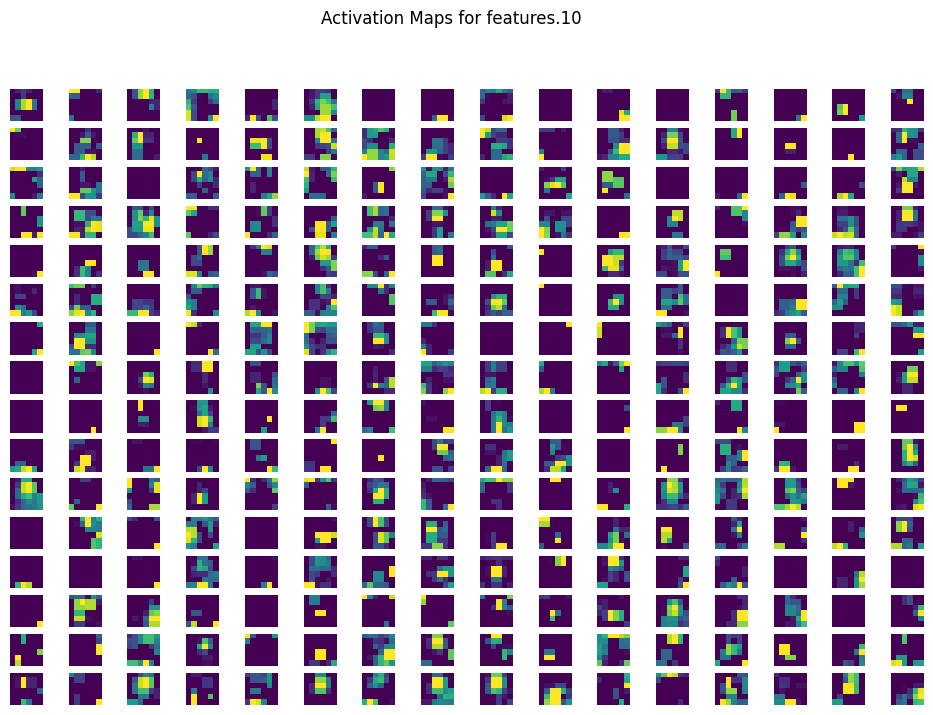

class 0: tench, Tinca tinca
class 1: goldfish, Carassius auratus
class 2: great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
class 3: tiger shark, Galeocerdo cuvieri
class 4: hammerhead, hammerhead shark
class 5: electric ray, crampfish, numbfish, torpedo
class 6: stingray
class 7: cock
class 8: hen
class 9: ostrich, Struthio camelus
tiger, Panthera tigris: 52.8718%
tiger cat: 47.1219%
zebra: 0.0047%
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus: 0.0007%
impala, Aepyceros melampus: 0.0002%


In [36]:
import torch
import torch.nn.functional as F
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the visualization function
def visualize_activation_maps(input_image, model, target_layer):
    # Set the model to evaluation mode
    model.eval()

    # Define a hook to retrieve the feature maps
    activation = {}
    def hook_fn(module, input, output):
        activation[target_layer] = output
    hook = model.features.register_forward_hook(hook_fn)

    # Forward pass the input image through the model
    with torch.no_grad():
        model(input_image)

    # Get the activation maps for the target layer
    feature_maps = activation[target_layer].squeeze().cpu().numpy()

    # Plot the activation maps
    num_maps = feature_maps.shape[0]
    rows = int(np.sqrt(num_maps))
    cols = int(np.ceil(num_maps / rows))

    plt.figure(figsize=(12, 8))
    for i in range(num_maps):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(feature_maps[i], cmap='viridis')
        plt.axis('off')

    plt.suptitle(f'Activation Maps for {target_layer}')
    plt.show()

if __name__ == "__main__":
    data_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = Image.open('/content/drive/MyDrive/tiger.jpg')

    transformed_img = data_transforms(img)

    batch_img = torch.unsqueeze(transformed_img, 0)
    print("image batch's size: " + str(batch_img.shape))

    alexnet = models.alexnet(pretrained=True)

    # Specify the target layer for visualization (e.g., 'features.10' for the 10th convolutional layer)
    target_layer = 'features.10'

    visualize_activation_maps(batch_img, alexnet, target_layer)

    with open('/content/drive/MyDrive/timepass/class_names_ImageNet.txt') as labels:
        classes = [i.strip() for i in labels.readlines()]

    for i in range(10):
        print("class " + str(i) + ": " + str(classes[i]))

    _, indexes = torch.sort(output, descending=True)
    percentage = F.softmax(output, dim=1)[0] * 100.0

    results = [(classes[i], percentage[i].item()) for i in indexes[0][:5]]

    for i in range(5):
        print('{}: {:.4f}%'.format(results[i][0], results[i][1]))


image batch's size: torch.Size([1, 3, 224, 224])


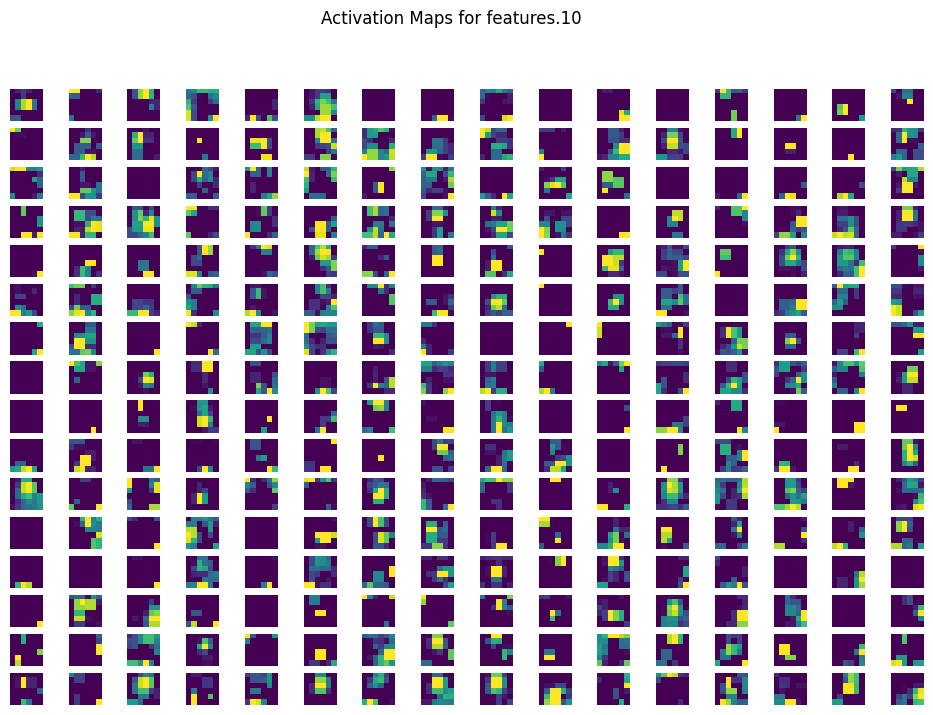

Top 5 predicted classes:
tiger, Panthera tigris: 52.8718%
tiger cat: 47.1219%
zebra: 0.0047%
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus: 0.0007%
impala, Aepyceros melampus: 0.0002%


FileNotFoundError: ignored

In [39]:
import torch
import torch.nn.functional as F
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the visualization function
def visualize_activation_maps(input_image, model, target_layer):
    # Set the model to evaluation mode
    model.eval()

    # Define a hook to retrieve the feature maps
    activation = {}
    def hook_fn(module, input, output):
        activation[target_layer] = output
    hook = model.features.register_forward_hook(hook_fn)

    # Forward pass the input image through the model
    with torch.no_grad():
        model(input_image)

    # Get the activation maps for the target layer
    feature_maps = activation[target_layer].squeeze().cpu().numpy()

    # Plot the activation maps
    num_maps = feature_maps.shape[0]
    rows = int(np.sqrt(num_maps))
    cols = int(np.ceil(num_maps / rows))

    plt.figure(figsize=(12, 8))
    for i in range(num_maps):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(feature_maps[i], cmap='viridis')
        plt.axis('off')

    plt.suptitle(f'Activation Maps for {target_layer}')
    plt.show()

if __name__ == "__main__":
    data_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = Image.open('/content/drive/MyDrive/tiger.jpg')

    transformed_img = data_transforms(img)

    batch_img = torch.unsqueeze(transformed_img, 0)
    print("image batch's size: " + str(batch_img.shape))

    alexnet = models.alexnet(pretrained=True)

    # Specify the target layer for visualization (e.g., 'features.10' for the 10th convolutional layer)
    target_layer = 'features.10'

    visualize_activation_maps(batch_img, alexnet, target_layer)

    with open('/content/drive/MyDrive/timepass/class_names_ImageNet.txt') as labels:
        classes = [i.strip() for i in labels.readlines()]

    output = alexnet(batch_img)
    _, indexes = torch.sort(output, descending=True)
    percentage = F.softmax(output, dim=1)[0] * 100.0

    results = [(classes[i], percentage[i].item()) for i in indexes[0][:5]]

    print("Top 5 predicted classes:")
    for i in range(5):
        print('{}: {:.4f}%'.format(results[i][0], results[i][1]))

    # Display the top 5 predicted class images
    top_classes = [result[0] for result in results]
    for class_name in top_classes:
        image_path = f'/content/drive/MyDrive/{class_name}.jpg'  # Replace with the actual path to your images
        img = Image.open(image_path)
        plt.figure()
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
        plt.show()
